In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_circuit_layout
from math import pi
import matplotlib.ticker as tck
%matplotlib inline
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
backend_sim = Aer.get_backend('qasm_simulator')
backend_exp = provider.get_backend('ibmqx2')
sh=1024
y_exp=np.array([])
y_sim=np.array([])
x=np.arange(0,(16.5)*pi/(4*5),pi/(4*5))
x_th=np.arange(0,4*pi/5,0.01) 
y_th=((np.cos(x_th*5))+1)/2

In [104]:
def BeamS(q,qr,c,cr,f):
    circ=QuantumCircuit(qr,cr)
    for i in range(q-1):
        circ.cx(i,i+1)
    circ.h(0)
    for i in range(q-1):
        circ.cx(i,i+1)
    circ=f+circ
    return circ

In [105]:
def measu(qr,cr,f):
    meas=QuantumCircuit(qr,cr)
    meas.barrier(qr[:])
    meas.measure(qr[:],cr[:])
    qc=f+meas
    return qc

In [79]:
def phase(q,qr,c,cr,ph,f):
    circ=QuantumCircuit(qr,cr)
    for i in range(q):
        circ.u1(ph,i)
    return f+circ

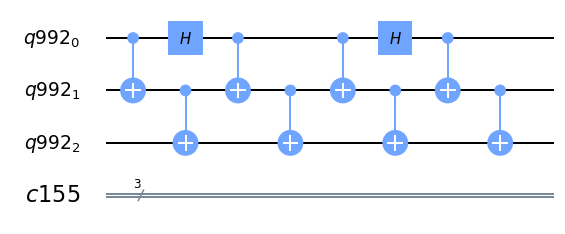

In [113]:
#Sim BS
q=3
c=3
qr=QuantumRegister(q)
cr=ClassicalRegister(c)
BS=QuantumCircuit(qr,cr)

#initialize state
#vec=np.zeros(2**q)
#vec[(2**q)-1]=1  
#MZ.initialize(vec, [qr[:]])

#Bit-Flips
#for i in range(q):
#    BS.x(i)

#BeamSplitters
BS=BeamS(q,qr,c,cr,BS)
BS=BeamS(q,qr,c,cr,BS)
#BS=measu(qr,cr,BS)



style={'cregbundle':True,'dpi':300,'fontsize':15,'subfontsize':15,'margin':[1,0.1,0.1,0.1], 'displaytext':{
    'id': 'id',
    'u0': 'U_0',
    'u1': 'U_1',
    'u2': 'U_2',
    'u3': 'U_3',
    'x': 'X',
    'y': 'Y',
    'z': 'Z',
    'h': 'H',
    's': 'S',
    'sdg': 'S^\dagger',
    't': 'T',
    'tdg': 'T^\dagger',
    'rx': 'R_x',
    'ry': 'R_y',
    'rz': 'R_z',
    'reset': '\left|0\right\rangle',
    'unitary': 'C^{2}'
}}
BS.draw(output='mpl',style=style,plot_barriers=False,justify='right',fold=30,filename='C2_2qubit_circuit.pdf')

In [114]:
backend_stv = Aer.get_backend('statevector_simulator')
job=execute(BS,backend_stv)
result=job.result()
outputstate=result.get_statevector(BS,decimals=3)
print(outputstate)

[ 0.5+0.j  0. +0.j  0. +0.j -0.5+0.j  0.5-0.j  0. +0.j  0. +0.j  0.5+0.j]


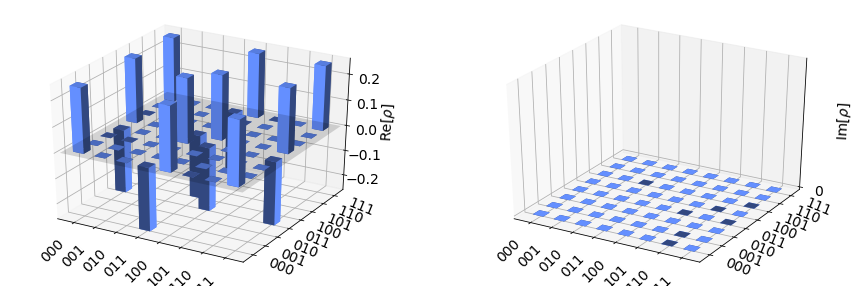

In [115]:
plot_state_city(outputstate)

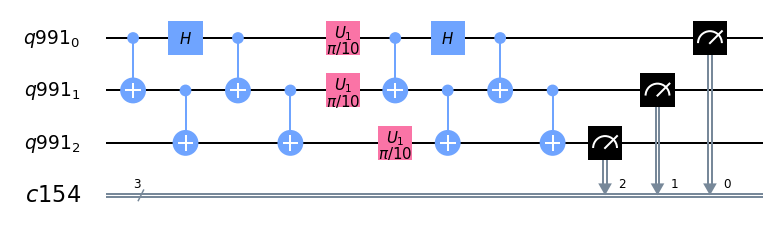

In [112]:
#Create circuit
q=5
c=5
qr=QuantumRegister(q)
cr=ClassicalRegister(c)
MZ=QuantumCircuit(qr,cr)
#initialize state
#vec=np.zeros(2**q)
#vec[(2**q)-1]=1  
#MZ.initialize(vec, [qr[:]])
#BeamSplitter
MZ=BeamS(q,qr,c,cr,MZ)
#phase
MZ=phase(q,qr,c,cr,pi/(2*5),MZ)
#BeamSplitter
MZ=BeamS(q,qr,c,cr,MZ)
#measurements
MZ=measu(qr,cr,MZ)

style={'cregbundle':True,'dpi':300,'fontsize':15,'subfontsize':15,'margin':[1,0.1,0.1,0.1]}


MZ.draw(output='mpl',style=style,plot_barriers=False,justify='right',fold=30,filename='MZ5_qubit.png')

Depth: 20


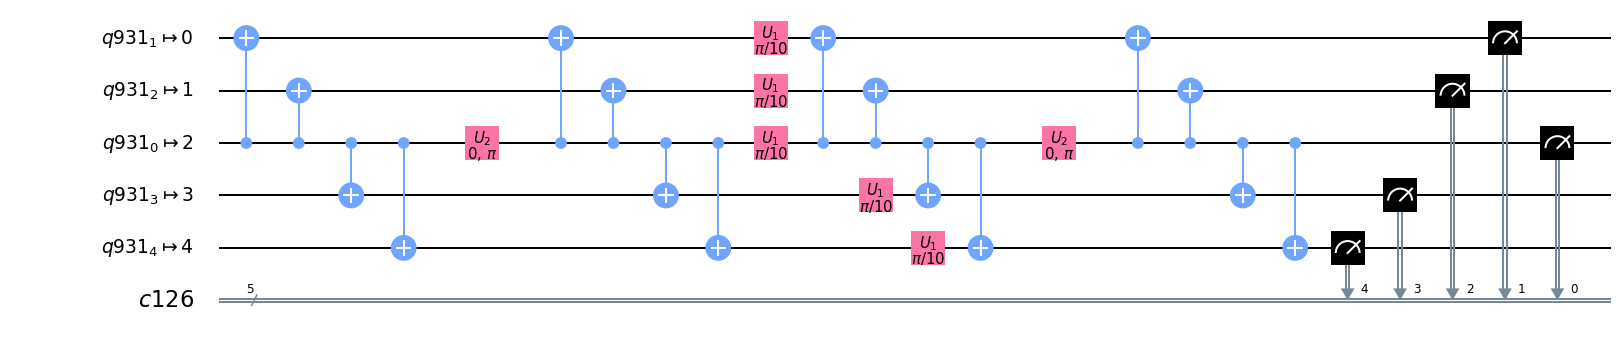

In [81]:
MZ_tp = transpile(MZ, backend=backend_exp, optimization_level=3, initial_layout=[2,0,1,3,4])
print('Depth:', MZ.depth())
MZ_tp.draw(output='mpl',style=style,plot_barriers=False,justify='right',fold=30,filename='MZ5_qubit_bad.png')

In [82]:
def MZI(q,qr,c,cr,ph):
    MZ=QuantumCircuit(qr,cr)
    #initialize state
    #vec=np.zeros(2**q)
    #vec[(2**q)-1]=1  
    #MZ.initialize(vec, [qr[:]])
    #BeamSplitter
    MZ=BeamS(q,qr,c,cr,MZ)
    #phase
    MZ=phase(q,qr,c,cr,ph,MZ)
    #BeamSplitter
    MZ=BeamS(q,qr,c,cr,MZ)
    #measurements
    MZ=measu(qr,cr,MZ)
    return MZ

In [83]:
q=5
c=5
qr=QuantumRegister(q)
cr=ClassicalRegister(c)
Mz=MZI(q,qr,c,cr,x[1])
Mz.draw()

┌───┐                                 »
q964_0: |0>──■────■────■────■──┤ H ├──■────■─────────────────■────■──»
           ┌─┴─┐  │    │    │  └───┘┌─┴─┐  │  ┌───────────┐  │    │  »
q964_1: |0>┤ X ├──┼────┼────┼───────┤ X ├──┼──┤ U1(pi/20) ├──┼────┼──»
           └───┘┌─┴─┐  │    │       └───┘┌─┴─┐├───────────┤  │    │  »
q964_2: |0>─────┤ X ├──┼────┼────────────┤ X ├┤ U1(pi/20) ├──┼────┼──»
                └───┘┌─┴─┐  │            └───┘└───────────┘┌─┴─┐  │  »
q964_3: |0>──────────┤ X ├──┼──────────────────────────────┤ X ├──┼──»
                     └───┘┌─┴─┐                            └───┘┌─┴─┐»
q964_4: |0>───────────────┤ X ├─────────────────────────────────┤ X ├»
                          └───┘                                 └───┘»
 c127_0: 0 ══════════════════════════════════════════════════════════»
                                                                     »
 c127_1: 0 ══════════════════════════════════════════════════════════»
                                                                     »
 c127_2: 0 ══════════════════════════════════════════════════════════»
                                                                     »
 c127_3: 0 ══════════════════════════════════════════════════════════»
                                                                     »
 c127_4: 0 ══════════════════════════════════════════════════════════»
                                                                     »
«        ┌───────────┐                    ┌───┐                     ░ ┌─┐      »
«q964_0: ┤ U1(pi/20) ├──■────■────■────■──┤ H ├──■────■────■────■───░─┤M├──────»
«        └───────────┘┌─┴─┐  │    │    │  └───┘┌─┴─┐  │    │    │   ░ └╥┘┌─┐   »
«q964_1: ─────────────┤ X ├──┼────┼────┼───────┤ X ├──┼────┼────┼───░──╫─┤M├───»
«                     └───┘┌─┴─┐  │    │       └───┘┌─┴─┐  │    │   ░  ║ └╥┘┌─┐»
«q964_2: ──────────────────┤ X ├──┼────┼────────────┤ X ├──┼────┼───░──╫──╫─┤M├»
«        ┌───────────┐     └───┘┌─┴─┐  │            └───┘┌─┴─┐  │   ░  ║  ║ └╥┘»
«q964_3: ┤ U1(pi/20) ├──────────┤ X ├──┼─────────────────┤ X ├──┼───░──╫──╫──╫─»
«        ├───────────┤          └───┘┌─┴─┐               └───┘┌─┴─┐ ░  ║  ║  ║ »
«q964_4: ┤ U1(pi/20) ├───────────────┤ X ├────────────────────┤ X ├─░──╫──╫──╫─»
«        └───────────┘               └───┘                    └───┘ ░  ║  ║  ║ »
«c127_0: ══════════════════════════════════════════════════════════════╩══╬══╬═»
«                                                                         ║  ║ »
«c127_1: ═════════════════════════════════════════════════════════════════╩══╬═»
«                                                                            ║ »
«c127_2: ════════════════════════════════════════════════════════════════════╩═»
«                                                                              »
«c127_3: ══════════════════════════════════════════════════════════════════════»
«                                                                              »
«c127_4: ══════════════════════════════════════════════════════════════════════»
«                                                                              »
«              
«q964_0: ──────
«              
«q964_1: ──────
«              
«q964_2: ──────
«        ┌─┐   
«q964_3: ┤M├───
«        └╥┘┌─┐
«q964_4: ─╫─┤M├
«         ║ └╥┘
«c127_0: ═╬══╬═
«         ║  ║ 
«c127_1: ═╬══╬═
«         ║  ║ 
«c127_2: ═╬══╬═
«         ║  ║ 
«c127_3: ═╩══╬═
«            ║ 
«c127_4: ════╩═
«

In [84]:
#simulating every circuit
circuits=[]
for i in range(len(x)):
    q=5
    c=5
    qr=QuantumRegister(q)
    cr=ClassicalRegister(c)
    MZ=MZI(q,qr,c,cr,x[i])
    circuits.append(MZ)
    
job_sim=execute(circuits,backend=backend_sim, shots=sh)
result_sim=job_sim.result()

y_sim=np.array([])
    
for i in range(len(x)):
    counts_sim=result_sim.get_counts(circuits[i])
    try:
        counts_sim['00000']
    except KeyError:
         y_sim=np.append(y_sim,[0])
    else:
        y_sim=np.append(y_sim,[counts_sim['00000']/sh])
        
y_sim
    


array([1.        , 0.84082031, 0.49511719, 0.15722656, 0.        ,
       0.14746094, 0.51953125, 0.8515625 , 1.        , 0.86523438,
       0.51464844, 0.13964844, 0.        , 0.13378906, 0.51464844,
       0.8515625 , 1.        ])

In [11]:
#EXP every circuit
circuits_tp=[]
for i in range(17):
    circuits_tp.append( transpile(circuits[i], backend=backend_exp, optimization_level=3, initial_layout=[2,0,1,3,4]))

#job_exp= execute(circuits_tp, backend=backend_exp)
#job_exp.job_id()

In [27]:
job_exp = backend_exp.retrieve_job('5e88f6fb063ef70019f0cad4')
result_exp=job_exp.result()
y_exp=np.array([])

for i in range(len(x)):
    counts_exp=result_exp.get_counts(i)
    try:
        counts_exp['00000']
    except KeyError:
         y_exp=np.append(y_exp,[0])
    else:
        y_exp=np.append(y_exp,[counts_exp['00000']/sh])
        
y_exp

array([0.93359375, 0.11914062, 0.23632812, 0.48730469, 0.63574219,
       0.62011719, 0.44628906, 0.24511719, 0.09472656, 0.08496094,
       0.265625  , 0.47753906, 0.6484375 , 0.65429688, 0.45898438,
       0.23046875, 0.08496094])

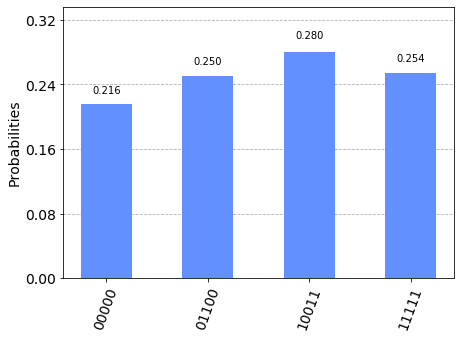

In [92]:
#Sim (Pi/4)
MZ=MZI(q,qr,c,cr,x[3])
job_sim = execute(MZ, backend_sim, shots=sh)
result_sim=job_sim.result()
counts_sim=result_sim.get_counts(MZ)
plot_histogram(counts_sim)

Depth: 20


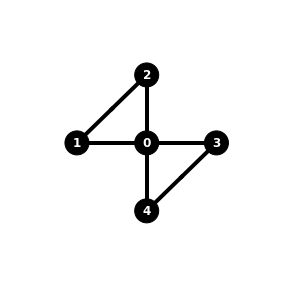

In [14]:
#exp (Pi/4)
MZ_tp = transpile(MZ, backend=backend_exp, optimization_level=3, initial_layout=[2,0,1,3,4])
print('Depth:', MZ_tp.depth())
plot_circuit_layout(MZ_tp, backend_exp)

In [15]:
#exp (Pi/4)
#job_exp= execute(MZ_tp, backend=backend_exp)
#job_exp.job_id()

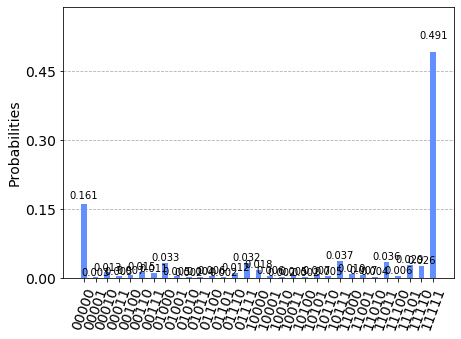

In [16]:
#exp (Pi/4)
job_exp = backend_exp.retrieve_job('5e6a5304dd548600112a7b80')
result_exp=job_exp.result()
counts=result_exp.get_counts()
plot_histogram(counts)

In [17]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [18]:
cal_circuits,state_labels=complete_meas_cal(qr=qr, circlabel='measurement_calibration')
cal_circuits[15].draw()

┌───┐ ░ ┌─┐            
q50_0: |0>┤ X ├─░─┤M├────────────
          ├───┤ ░ └╥┘┌─┐         
q50_1: |0>┤ X ├─░──╫─┤M├─────────
          ├───┤ ░  ║ └╥┘┌─┐      
q50_2: |0>┤ X ├─░──╫──╫─┤M├──────
          ├───┤ ░  ║  ║ └╥┘┌─┐   
q50_3: |0>┤ X ├─░──╫──╫──╫─┤M├───
          └───┘ ░  ║  ║  ║ └╥┘┌─┐
q50_4: |0>──────░──╫──╫──╫──╫─┤M├
                ░  ║  ║  ║  ║ └╥┘
 c19_0: 0 ═════════╩══╬══╬══╬══╬═
                      ║  ║  ║  ║ 
 c19_1: 0 ════════════╩══╬══╬══╬═
                         ║  ║  ║ 
 c19_2: 0 ═══════════════╩══╬══╬═
                            ║  ║ 
 c19_3: 0 ══════════════════╩══╬═
                               ║ 
 c19_4: 0 ═════════════════════╩═

In [19]:
#cal_job=execute(cal_circuits, backend=backend_exp, shots=8192,optimization_level=0)
#cal_job.job_id()

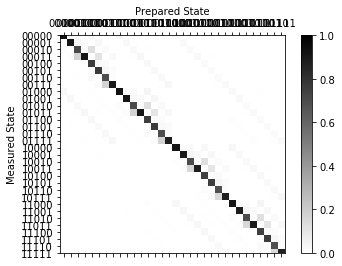

In [20]:
cal_job = backend_exp.retrieve_job('5e6a56a2136d9400110dab15')
cal_results=cal_job.result()
meas_fitter=CompleteMeasFitter(cal_results,state_labels)
meas_fitter.plot_calibration()


In [21]:
meas_filter=meas_fitter.filter

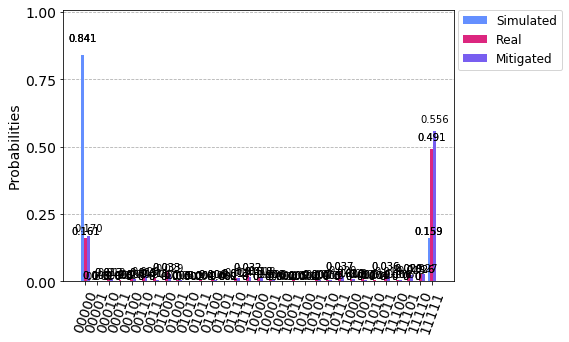

In [22]:
#mitigated exp Pi/4
job_exp = backend_exp.retrieve_job('5e6a5304dd548600112a7b80')
result_exp=job_exp.result()
mitigated_result=meas_filter.apply(result_exp)
counts=result_exp.get_counts()
mitigated_counts=mitigated_result.get_counts()
plot_histogram([counts_sim,counts,mitigated_counts],legend=['Simulated','Real','Mitigated'])

In [23]:
y_sim

array([1.        , 0.86132812, 0.49121094, 0.15332031, 0.        ,
       0.14453125, 0.51464844, 0.8359375 , 1.        , 0.84863281,
       0.46191406, 0.15820312, 0.        , 0.13378906, 0.51074219,
       0.87402344, 1.        , 0.84082031])

In [24]:
x

array([0.        , 0.15707963, 0.31415927, 0.4712389 , 0.62831853,
       0.78539816, 0.9424778 , 1.09955743, 1.25663706, 1.41371669,
       1.57079633, 1.72787596, 1.88495559, 2.04203522, 2.19911486,
       2.35619449, 2.51327412])

In [25]:
y_exp

array([0.93359375, 0.11914062, 0.23632812, 0.48730469, 0.63574219,
       0.62011719, 0.44628906, 0.24511719, 0.09472656, 0.08496094,
       0.265625  , 0.47753906, 0.6484375 , 0.65429688, 0.45898438,
       0.23046875, 0.08496094, 0.16113281, 0.16113281])

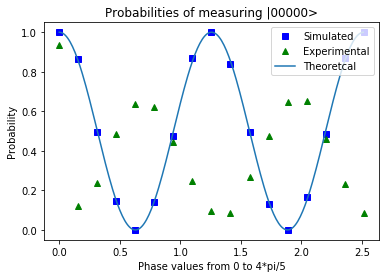

In [29]:
plt.plot(x,y_sim,'bs',x,y_exp,'g^',x_th,y_th)
plt.xlabel('Phase values from 0 to 4*pi/5') 
plt.ylabel('Probability')
plt.title('Probabilities of measuring |00000>')
plt.legend(['Simulated', 'Experimental','Theoretcal'],loc=1)     
plt.show()

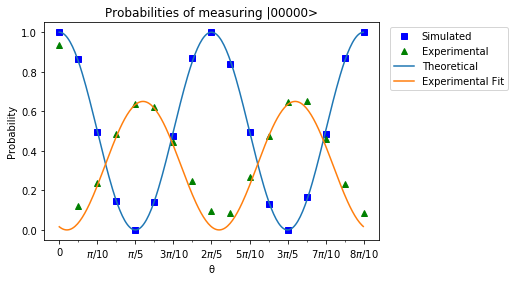

In [49]:
fig, ax = plt.subplots()
x_fit=np.arange(0,2*pi/5,0.01) 
y_fit = 0.65*(np.cos(5*((x_th)+(18*pi/100)))+1)/2
ax.plot(x,y_sim,'bs',x,y_exp,'g^',x_th,y_th,x_th,y_fit)
plt.xlabel('θ') 
plt.ylabel('Probability')
plt.title('Probabilities of measuring |00000>')
lg=plt.legend(['Simulated', 'Experimental','Theoretical','Experimental Fit'],loc=1, bbox_to_anchor=(1.4,1))
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 20))

def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(10 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/10$"
    elif N == 2:
        return r"$\pi/5$"
    elif N == 4:
        return r"$2\pi/5$"
    elif N== 6:
        return r"$3\pi/5$"
    elif N % 2 > 0:
        return r"${0}\pi/10$".format(N)
    else:
        return r"${0}\pi/10$".format(N // 1)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

plt.show()
fig.savefig('MZ_5qubit_graph.pdf',bbox_extra_artists=(lg,), bbox_inches='tight')

In [ ]:
MZ_tp.draw()